# Modeling
## 1. Import cleaned data

In [50]:
import pandas as pd
import numpy as np
import sys, os
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns
sns.set_palette('muted')
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')


Bad key "text.kerning_factor" on line 4 in
/Users/yifuhe/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [109]:
data_path = os.path.join(os.getcwd(),'data')
train = pd.read_csv(os.path.join(data_path, "train.csv"))
# train = pd.read_csv(os.path.join(data_path, "train_resample.csv"))
test = pd.read_csv(os.path.join(data_path, "test.csv"))

In [110]:
X_train, Y_train = train.iloc[:,1:], train["loan_status"] 
X_test, Y_test = test.iloc[:,1:], test["loan_status"] 

## 2. logistic regression


In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix

def show_result(clf, X_train, Y_train, X_test, Y_test):
    print("Accuracy on train set: {}".format(clf.score(X_train, Y_train)))
    print("Accuracy on test set: {}".format(clf.score(X_test, Y_test)))
    plot_confusion_matrix(clf, X_test, Y_test,
                                 #display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 #normalize=normalize
                     )

Accuracy on train set: 0.8563574099092023
Accuracy on test set: 0.861631268065854


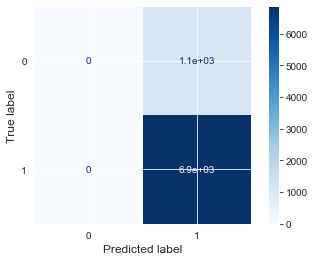

In [112]:
clf_logistic = LogisticRegression(n_jobs = -1).fit(X_train, Y_train)
show_result(clf_logistic,X_train,Y_train,X_test,Y_test)

In [44]:
sum(Y_train == 1)/len(Y_train)

0.8564516635772409

## 3.Decision Tree

Accuracy on train set: 1.0
Accuracy on test set: 0.7614678899082569


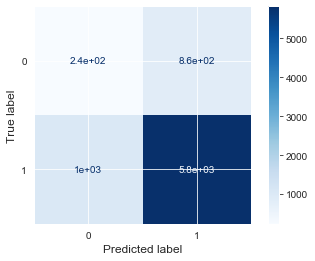

In [113]:
from sklearn import tree
clf_decisionTree = tree.DecisionTreeClassifier()
clf_decisionTree = clf_decisionTree.fit(X_train, Y_train)
show_result(clf_decisionTree,X_train,Y_train,X_test,Y_test)

## 4. Random Forest

Accuracy on train set: 0.9999685821106538
Accuracy on test set: 0.8610028905366344


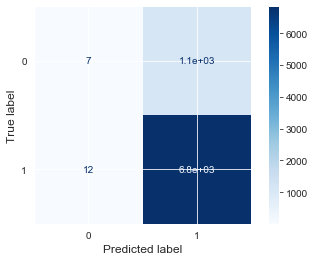

In [114]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_jobs = -1)
clf_rf.fit(X_train,Y_train)
show_result(clf_rf,X_train,Y_train,X_test,Y_test)

In [95]:
sum(Y_test == 1)/len(Y_test)

0.861631268065854

In [ ]:
clf_rf.